In [1]:
import pandas as pd
df = pd.read_csv("housewarming2.csv")
df.head()

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...
1,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,4200,5610,75,26,12,https://ohou.se/projects/126600/detail?affect_...
2,2,2022-10-07,취향을 읽고 쓰는 비밀 서재처럼- 푸릇푸릇 3평 방,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,0,4214,201,60,15,https://ohou.se/projects/123056/detail?affect_...
3,3,2022-10-07,손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링,신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문",리모델링,전문가,5500,37375,643,169,122,https://ohou.se/projects/116945/detail?affect_...
4,4,2022-10-07,아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈,신혼부부,아파트,55,내추럴,"주방리모델링, 중문",리모델링,전문가,9500,3760,73,13,9,https://ohou.se/projects/127436/detail?affect_...


## 1. 공간별 평수구간 분포 
#### -공간별 평균 인테리어 작업 평수는?

In [101]:
# 공간 별 평수구간 평균 
df.groupby('공간')['평수구간'].mean().sort_values(ascending=False)

공간
단독주택       45.280210
아파트        32.181118
빌라&연립      23.075221
사무공간       19.000000
상업공간       19.000000
기타         16.506849
원룸&오피스텔    10.959752
Name: 평수구간, dtype: float64

In [67]:
# 공간별 평수구간 분포 
df.groupby('공간')['평수구간'].value_counts(ascending=False) 

## 기타 - 5평
## 단독주택 - 75평
## 빌라&연립 - 15평
## 사무공간 - 15평
## 상업공간 - 15평
## 아파트 - 35평
## 원룸&오피스텔 - 5평

# 기타 - 자기 방? 

공간       평수구간
기타       5        135
         35        33
         15        19
         25        12
         55         8
         75         6
         45         4
         65         2
단독주택     75       112
         35       106
         45       101
         25        90
         55        61
         15        45
         65        44
         5         12
빌라&연립    15       209
         25       108
         35        61
         5         32
         45        21
         65         8
         55         7
         75         6
사무공간     15         6
         25         2
         5          1
         45         1
상업공간     15         6
         5          4
         25         3
         35         1
         65         1
아파트      35      1354
         25      1029
         45       244
         15       155
         55       116
         5         44
         65        27
         75        18
원룸&오피스텔  5        369
         15       211
         25        46
         45       

In [72]:
# 공간 중 '기타'와 가족형태 
df.groupby(df['공간']=='기타')['가족형태'].count() # 219명 

공간
False    4681
True      219
Name: 가족형태, dtype: int64

In [74]:
df.groupby(df['공간']=='기타')['가족형태'].value_counts() # 부모님과 함께 사는 집 >> 신혼부부 > 싱글라이프

공간     가족형태                               
False  신혼부부                                   1866
       싱글라이프                                   941
       아기가 있는 집                                717
       취학 자녀가 있는 집                             549
       부모님과 함께 사는 집                            233
       기타                                      223
       신혼부부, 아기가 있는 집                           43
       신혼부부, 기타                                 32
       아기가 있는 집, 취학 자녀가 있는 집                    31
       싱글라이프, 기타                                18
       취학 자녀가 있는 집, 부모님과 함께 사는 집                 5
       아기가 있는 집, 기타                              4
       부모님과 함께 사는 집, 기타                          3
       취학 자녀가 있는 집, 기타                           3
       신혼부부, 부모님과 함께 사는 집                        2
       싱글라이프, 부모님과 함께 사는 집                       2
       싱글라이프, 부모님과 함께 사는 집, 기타                   2
       아기가 있는 집, 부모님과 함께 사는 집                    2
       아기가 있는 집, 취학 자녀가 있는 집, 기타       

### 가설 : 공간 '기타'는 '부모님과 함께 사는 집'에서 부분만 인테리어 작업을 했을 것이다.

In [93]:
# 기타 & 부모님과 함께 사는 집
df_and = df[(df['가족형태'] == '부모님과 함께 사는 집') & (df['공간'] == '기타')]
df_and2 = df_and['평수구간'].value_counts(ascending=False)
df_and2 # 5평 > 35평 > 25평 > 15평  

5     71
35    19
25     5
15     4
55     2
45     2
75     1
Name: 평수구간, dtype: int64

## 시각화 

([<matplotlib.axis.XTick at 0x7fa0d4c018e0>,
 [Text(0, 0, '5'),
  Text(1, 0, '35'),
  Text(2, 0, '25'),
  Text(3, 0, '15'),
  Text(4, 0, '55'),
  Text(5, 0, '45'),
  Text(6, 0, '75')])

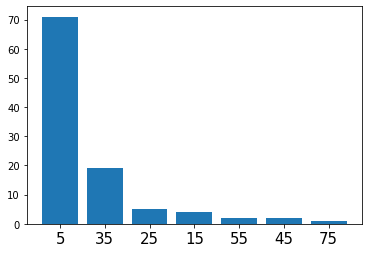

In [95]:
import numpy as np
import matplotlib.pyplot as plt

label = df_and2.index
index = np.arange(len(label))
plt.bar(index, df_and2)
plt.xticks(index, label, fontsize=15)

# 기타 - 5평이 압도적으로 많음

In [104]:
# 부모님과 함께 사는집, 기타, 5평
df_and[df_and['평수구간']==5].sort_values('조회대비스크랩',ascending=False)

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,조회대비스크랩,url
633,633,2022-06-23,리빙 브랜드 디렉터 논디의 기록하는 생활 🖊,부모님과 함께 사는 집,기타,5,0,0,홈스타일링,셀프•DIY,172.64,23493,1751,355,15,74.53,https://ohou.se/projects/105637/detail?affect_...
651,651,2022-06-21,무채색 모던에 새벽의 푸르스름한 분위기를 더한 방,부모님과 함께 사는 집,기타,5,모던,0,홈스타일링,셀프•DIY,172.64,39759,2918,512,27,73.39,https://ohou.se/projects/94855/detail?affect_t...
432,432,2022-07-25,비밀스러운 홈 오피스를 품은 무채색 감성 방테리어,부모님과 함께 사는 집,기타,5,모던,0,홈스타일링,반셀프,172.64,38313,2768,559,74,72.25,https://ohou.se/projects/112622/detail?affect_...
1546,1546,2022-01-14,제품 디자이너의 안목이 담긴 미니 스튜디오st 작은 방,부모님과 함께 사는 집,기타,5,북유럽,0,홈스타일링,셀프•DIY,172.64,59515,3863,1074,45,64.91,https://ohou.se/projects/71430/detail?affect_t...
761,761,2022-06-04,유럽 감성을 한 스푼 담은 2.5평 나의 안식처,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,172.64,33348,2135,377,23,64.02,https://ohou.se/projects/98289/detail?affect_t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,841,2022-05-24,맥시멀리스트가 핑크빛으로 물들인 3평 방💗,부모님과 함께 사는 집,기타,5,유니크&믹스매치,0,홈스타일링,셀프•DIY,172.64,26450,639,163,13,24.16,https://ohou.se/projects/97746/detail?affect_t...
2314,2314,2021-08-18,"동양적인 매력으로 가득한 나만의 작은 정원, 비나리움",부모님과 함께 사는 집,기타,5,빈티지&레트로,0,홈스타일링,셀프•DIY,172.64,45612,1078,216,40,23.63,https://ohou.se/projects/57313/detail?affect_t...
856,856,2022-05-21,스물다섯 대학생의 좋아하는 것 가득한 방 꾸미기,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,172.64,11908,273,68,25,22.93,https://ohou.se/projects/96937/detail?affect_t...
2303,2303,2021-08-20,심심하면 방 구조를 바꾸는 내가 정착한 5평의 가구배치,부모님과 함께 사는 집,기타,5,"내추럴, 빈티지&레트로",0,홈스타일링,셀프•DIY,172.64,93167,2013,403,77,21.61,https://ohou.se/projects/56988/detail?affect_t...


### -스타일 파일 병합 

In [115]:
# 스타일 파일 병합
df_style = pd.read_csv('style_code.csv')
df_style.rename({'Unnamed: 0':'id'},axis=1, inplace=True)
df_style = pd.merge(df, df_style, how='left')
df_style

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,...,한국&아시아,러블리&로맨틱,빈티지&레트로,인더스트리얼,모던,프렌치&프로방스,유니크&믹스매치,내추럴,미니멀&심플,북유럽
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,...,0,0,0,0,0,0,0,1,0,0
1,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,...,0,0,0,0,1,0,0,0,0,0
2,2,2022-10-07,취향을 읽고 쓰는 비밀 서재처럼- 푸릇푸릇 3평 방,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,...,0,0,0,0,0,0,0,1,0,0
3,3,2022-10-07,손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링,신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문",리모델링,전문가,...,0,0,0,0,1,0,0,0,0,0
4,4,2022-10-07,아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈,신혼부부,아파트,55,내추럴,"주방리모델링, 중문",리모델링,전문가,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,4895,2019-10-27,25년 된 신혼집 반셀프 인테리어 도전기,신혼부부,아파트,35,"모던, 미니멀&심플, 북유럽","주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,반셀프,...,0,0,0,0,1,0,0,0,0,1
4896,4896,2019-10-26,애정 가득 신혼집 : 작은 평수 아파트도 넓고 쾌적하게,신혼부부,아파트,25,"모던, 미니멀&심플","조명시공, 중문",부분공사,반셀프,...,0,0,0,0,1,0,0,0,0,0
4897,4897,2019-10-26,"제주, 그리고 우리 셋 삶의 공간",아기가 있는 집,빌라&연립,35,미니멀&심플,조명시공,홈스타일링,전문가,...,0,0,0,0,0,0,0,0,0,0
4898,4898,2019-10-26,지금의 행복을 택하는 건 꽤 의미있는 투자일지도 몰라요,아기가 있는 집,아파트,25,"미니멀&심플, 내추럴","주방리모델링, 중문, 슬라이딩도어",리모델링,전문가,...,0,0,0,0,0,0,0,1,0,0


In [146]:
# 스타일 분포 확인
for i in columns:
    total = df_style[i].sum()
    print(i, total)

클래식&앤틱 0
한국&아시아 67
러블리&로맨틱 170
빈티지&레트로 556
인더스트리얼 24
모던 1389
프렌치&프로방스 69
유니크&믹스매치 269
내추럴 2283
미니멀&심플 0
북유럽 308


In [148]:
# 데이터 프레임으로 만들어서 시각화
dff = pd.DataFrame({'style':['클래식&앤틱','한국&아시아','러블리&로맨틱','빈티지&레트로','인더스트리얼','모던','프렌치&프로방스','유니크&믹스매치','내추럴','미니멀&심플','북유럽'],
                    'hap':[0,67,170,556,24,1389,69,269,2283,0,308]})
dff

,style,hap
0,클래식&앤틱,0
1,한국&아시아,67
2,러블리&로맨틱,170
3,빈티지&레트로,556
4,인더스트리얼,24
5,모던,1389
6,프렌치&프로방스,69
7,유니크&믹스매치,269
8,내추럴,2283
9,미니멀&심플,0


In [156]:
dff = dff.sort_values(by=['hap'],ascending=False) # 스타일 트렌드 : 내추럴 > 모던 > 빈티지&레트로...
dff

,style,hap
8,내추럴,2283
5,모던,1389
3,빈티지&레트로,556
10,북유럽,308
7,유니크&믹스매치,269
2,러블리&로맨틱,170
6,프렌치&프로방스,69
1,한국&아시아,67
4,인더스트리얼,24
0,클래식&앤틱,0


<AxesSubplot:xlabel='style'>

/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47092 (\N{HANGUL SYLLABLE REOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45912 (\N{HANGUL SYLLABLE DEON}) missing from current font.
  fig.canvas.prin

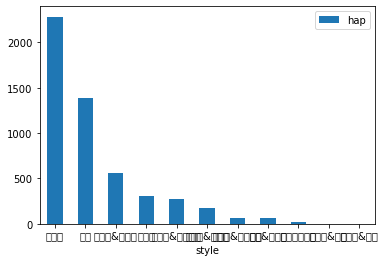

In [157]:
# 스타일 분포 시각화
dff.plot.bar(x='style',y='hap',rot=0)

## 스타일 추천 기준 : 가족형태 + 공간 + 평수구간  

#### 1) 부모님과 함께 사는 집(가족형태) + 단독주택(공간) +  5평(평수구간) 

In [136]:
columns=["클래식&앤틱","한국&아시아","러블리&로맨틱","빈티지&레트로","인더스트리얼","모던","프렌치&프로방스","유니크&믹스매치","내추럴","미니멀&심플","북유럽"]

In [139]:
df_bumo_5 = df_style[(df_style['가족형태'] == '부모님과 함께 사는 집') & (df_style['공간'] == '기타') & (df_style['평수구간']==5)]

# '스타일 빈도수'만 합계 후 출력
for i in columns:
    total = df_bumo_5[i].sum()
    print(i, total)

클래식&앤틱 0
한국&아시아 0
러블리&로맨틱 4
빈티지&레트로 13
인더스트리얼 0
모던 14
프렌치&프로방스 0
유니크&믹스매치 7
내추럴 20
미니멀&심플 0
북유럽 5


In [158]:
df.groupby(df['공간']=='단독주택')['가족형태'].value_counts()

공간     가족형태                               
False  신혼부부                                   1784
       싱글라이프                                   912
       아기가 있는 집                                634
       취학 자녀가 있는 집                             412
       부모님과 함께 사는 집                            289
       기타                                      170
       신혼부부, 아기가 있는 집                           37
       신혼부부, 기타                                 28
       아기가 있는 집, 취학 자녀가 있는 집                    26
       싱글라이프, 기타                                17
       부모님과 함께 사는 집, 기타                          3
       신혼부부, 부모님과 함께 사는 집                        2
       싱글라이프, 부모님과 함께 사는 집                       2
       아기가 있는 집, 기타                              2
       아기가 있는 집, 부모님과 함께 사는 집                    2
       취학 자녀가 있는 집, 기타                           2
       취학 자녀가 있는 집, 부모님과 함께 사는 집                 2
       신혼부부, 아기가 있는 집, 기타                        1
       싱글라이프, 부모님과 함께 사는 집, 기타         

In [161]:
df_jn_75 = df_style[(df_style['가족형태'] == '취학 자녀가 있는 집') & (df_style['공간'] == '단독주택') & (df_style['평수구간']==75)]

# '스타일 빈도수'만 합계 후 출력
for i in columns:
    total = df_jn_75[i].sum()
    print(i, total)

클래식&앤틱 0
한국&아시아 0
러블리&로맨틱 0
빈티지&레트로 1
인더스트리얼 0
모던 17
프렌치&프로방스 0
유니크&믹스매치 5
내추럴 27
미니멀&심플 0
북유럽 3


#### -> 결과 
- 기준 : 가족형태 + 공간 + 평수구간
#### 부모님과 함께 사는 집 +단독주택+ 5평
- 스타일 : 내추럴, 모던, 빈티지&레트로 추천
#### 취학자녀가 있는 집+ 단독주택 + 75평
- 스타일 : 내추럴,모던, 유니크&믹스매치 추천

## 2. 예산 
#### - 평수구간의 예산 평균값으로 null값 처리하기

In [2]:
df['예산'].sort_values(ascending=False).head(10)

394     71700
3563    70000
4147    70000
330     68000
393     55000
2157    50000
1467    50000
2046    45000
2610    42000
1396    40000
Name: 예산, dtype: int64

<AxesSubplot:xlabel='평수구간', ylabel='예산'>

/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.prin

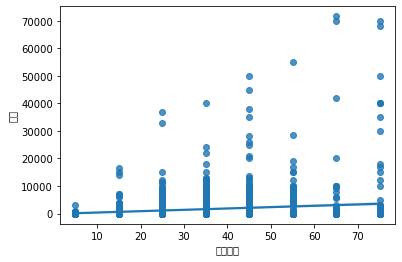

In [3]:
# 평수 대비 예산 분포 시각화
import seaborn as sns
sns.regplot(x = '평수구간', y = '예산',data = df) # 평수가 넓어질수록 예산은 늘어난다.

In [4]:
df['평수구간'].unique() # 평수구간 확인

array([35,  5, 55, 15, 25, 45, 75, 65])

In [43]:
## null값 포함된 행 제외, 평수구간 대비 평균예산
non_zero = df[:][df['예산']!=0]
non_zero.groupby('평수구간')['예산'].mean()

평수구간
5      172.64
15     925.10
25    2630.34
35    3379.88
45    5911.72
55    5861.31
65    8306.45
75    9936.68
Name: 예산, dtype: float64

#### -> 결론 : 평수가 넓어질수록 예산이 늘어난다.

In [50]:
df.groupby(df['평수구간']==5)['예산'].value_counts()

평수구간   예산     
False  3379.88    1561
       2630.34    1290
       925.10      651
       5911.72     382
       5861.31     192
       9936.68     144
       8306.45      83
True   172.64      597
Name: 예산, dtype: int64

In [45]:
# 조건 - ex) 만일 '평수구간'이 5라면 '예산'칼럼의 값은 172.64로 변경할 것
# 각 평수구간 대비 예산 평균값으로 채워줌
df.loc[df["평수구간"] == 5, "예산"] = 172.64
df.loc[df["평수구간"] == 15, "예산"] = 925.10
df.loc[df["평수구간"] == 25, "예산"] = 2630.34
df.loc[df["평수구간"] == 35, "예산"] = 3379.88
df.loc[df["평수구간"] == 45, "예산"] = 5911.72
df.loc[df["평수구간"] == 55, "예산"] = 5861.31
df.loc[df["평수구간"] == 65, "예산"] = 8306.45
df.loc[df["평수구간"] == 75, "예산"] = 9936.68

In [46]:
df[df["예산"]==0].value_counts() # 예산이 '0'인 값이 없음 (잘 채웠다)

Series([], dtype: int64)

In [53]:
# 상관분석
from statsmodels.formula.api import ols
ols('예산 ~ 평수구간',df).fit().summary() # R-squared:0.962 (96%라니..) # 원래 자명한 결과

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     예산   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.241e+05
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:07:48   Log-Likelihood:                -36471.
No. Observations:                4900   AIC:                         7.295e+04
Df Residuals:                    4898   BIC:                         7.296e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -879.2924     12.587    -69.860      0.000    -903.968    -854.617
평수구간         133.6324      0.379    352.290      0.000     132.889     134.376
==============================================================================
Omnibus:                     1045.138   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.314
Skew:                           0.402   Prob(JB):                     1.02e-70
Kurtosis:                       2.035   Cond. No.                         70.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='평수구간', ylabel='예산'>

/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.prin

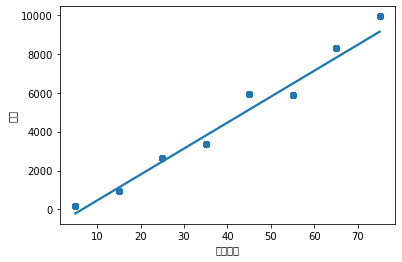

In [55]:
import seaborn as sns
sns.regplot(x = '평수구간', y = '예산',data = df)

## 3. 조회수 대비 스크랩수 
#### - '조회대비스크랩' 열 추가

In [5]:
# 조회수 대비 스크랩수가 많은 것 행 추가 
df['조회대비스크랩'] = df['스크랩'] / df['조회'] * 1000
df['조회대비스크랩'] = round(df['조회대비스크랩'], 2)
df['조회대비스크랩'].sort_values(ascending=False) 

545     86.44
928     83.67
473     80.76
537     76.85
459     75.73
        ...  
2304     8.44
4816     8.08
1044     6.52
1064     5.41
4727     4.61
Name: 조회대비스크랩, Length: 4900, dtype: float64

In [6]:
# '조회대비스크랩' 열 위치 조정
df = df[['id','작성일','제목','가족형태','공간','평수구간','스타일','세부공사','분야','작업','예산','조회','스크랩','좋아요','댓글','조회대비스크랩','url']]
df

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,조회대비스크랩,url
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,12.94,https://ohou.se/projects/126917/detail?affect_...
1,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,4200,5610,75,26,12,13.37,https://ohou.se/projects/126600/detail?affect_...
2,2,2022-10-07,취향을 읽고 쓰는 비밀 서재처럼- 푸릇푸릇 3평 방,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,0,4214,201,60,15,47.70,https://ohou.se/projects/123056/detail?affect_...
3,3,2022-10-07,손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링,신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문",리모델링,전문가,5500,37375,643,169,122,17.20,https://ohou.se/projects/116945/detail?affect_...
4,4,2022-10-07,아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈,신혼부부,아파트,55,내추럴,"주방리모델링, 중문",리모델링,전문가,9500,3760,73,13,9,19.41,https://ohou.se/projects/127436/detail?affect_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,4895,2019-10-27,25년 된 신혼집 반셀프 인테리어 도전기,신혼부부,아파트,35,"모던, 미니멀&심플, 북유럽","주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,반셀프,3000,82539,2865,723,67,34.71,https://ohou.se/projects/17105/detail?affect_t...
4896,4896,2019-10-26,애정 가득 신혼집 : 작은 평수 아파트도 넓고 쾌적하게,신혼부부,아파트,25,"모던, 미니멀&심플","조명시공, 중문",부분공사,반셀프,500,45480,713,236,30,15.68,https://ohou.se/projects/16242/detail?affect_t...
4897,4897,2019-10-26,"제주, 그리고 우리 셋 삶의 공간",아기가 있는 집,빌라&연립,35,미니멀&심플,조명시공,홈스타일링,전문가,0,39918,350,201,22,8.77,https://ohou.se/projects/15965/detail?affect_t...
4898,4898,2019-10-26,지금의 행복을 택하는 건 꽤 의미있는 투자일지도 몰라요,아기가 있는 집,아파트,25,"미니멀&심플, 내추럴","주방리모델링, 중문, 슬라이딩도어",리모델링,전문가,0,94423,2529,980,88,26.78,https://ohou.se/projects/7660/detail?affect_ty...


In [7]:
# 조회대비스크랩 수가 많은 url 분석
df['조회대비스크랩'].sort_values(ascending=False).head(10) # 상위 10개 url 파악하기

545     86.44
928     83.67
473     80.76
537     76.85
459     75.73
799     74.56
702     74.55
633     74.53
778     73.79
4281    73.46
Name: 조회대비스크랩, dtype: float64

In [8]:
# 조회수 대비 스크랩 수가 많은 행 뽑기
df_interest = df.loc[[545,928,473,537,459,799,702,633,778,4281],:]
df_interest

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,조회대비스크랩,url
545,545,2022-07-06,빈티지 소품으로 꽉꽉 채워 꾸민 맥시멀리스트의 3평방,부모님과 함께 사는 집,기타,35,빈티지&레트로,0,홈스타일링,셀프•DIY,0,18765,1622,315,33,86.44,https://ohou.se/projects/107047/detail?affect_...
928,928,2022-05-09,깔끔한 무채색에 블루 포인트! 투잡러의 홈오피스,싱글라이프,원룸&오피스텔,5,모던,0,홈스타일링,셀프•DIY,200,72033,6027,1228,45,83.67,https://ohou.se/projects/95635/detail?affect_t...
473,473,2022-07-17,블랙앤화이트 그리고 실버로 가득한 무채색 사랑꾼의 집,싱글라이프,원룸&오피스텔,5,모던,0,홈스타일링,셀프•DIY,0,51126,4129,815,46,80.76,https://ohou.se/projects/111864/detail?affect_...
537,537,2022-07-08,맥시멀리스트 식집사의 맥시멀 플랜테리어 🌳,부모님과 함께 사는 집,아파트,35,0,0,홈스타일링,셀프•DIY,0,9928,763,94,9,76.85,https://ohou.se/projects/89789/detail?affect_t...
459,459,2022-07-20,해외 문학 편집자가 추천하는! 여름에 읽기 좋은 책📖,싱글라이프,빌라&연립,15,0,0,홈스타일링,셀프•DIY,0,9891,749,151,8,75.73,https://ohou.se/projects/112266/detail?affect_...
799,799,2022-05-30,지브리 영화 한 장면을 똑! 떼어 놓은듯한 빈티지룸,싱글라이프,원룸&오피스텔,15,"내추럴, 빈티지&레트로",0,홈스타일링,셀프•DIY,0,42355,3158,786,51,74.56,https://ohou.se/projects/98403/detail?affect_t...
702,702,2022-06-12,귀여움이 세상을 구한다! 큐티뽀짝 하이틴룸 💖,부모님과 함께 사는 집,기타,25,러블리&로맨틱,0,홈스타일링,셀프•DIY,200,24358,1816,408,86,74.55,https://ohou.se/projects/101026/detail?affect_...
633,633,2022-06-23,리빙 브랜드 디렉터 논디의 기록하는 생활 🖊,부모님과 함께 사는 집,기타,5,0,0,홈스타일링,셀프•DIY,0,23493,1751,355,15,74.53,https://ohou.se/projects/105637/detail?affect_...
778,778,2022-06-01,지구도 지키고 피부도 지키는! 천연 화장품 만들기,신혼부부,아파트,35,0,0,리모델링,전문가,0,3293,243,46,13,73.79,https://ohou.se/projects/101066/detail?affect_...
4281,4281,2020-04-25,확고한 기준으로 도전한 시도들이 매력적인 아파트,신혼부부,아파트,35,북유럽,0,리모델링,전문가,0,94858,6968,2234,107,73.46,https://ohou.se/projects/29510/detail?affect_t...


In [57]:
# 예산 - 조회, 스크랩의 상관관계 살펴보기
ols('조회 ~ 예산', df).fit().summary() #R-squared: 0.021 -> 상관관계 거의 없음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     조회   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           2.39e-24
Time:                        19:11:30   Log-Likelihood:                -58577.
No. Observations:                4900   AIC:                         1.172e+05
Df Residuals:                    4898   BIC:                         1.172e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.277e+04    938.829     66.862      0.000    6.09e+04    6.46e+04
예산            -2.5946      0.253    -10.237      0.000      -3.092      -2.098
==============================================================================
Omnibus:                     2292.947   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17635.549
Skew:                           2.084   Prob(JB):                         0.00
Kurtosis:                      11.307   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='예산', ylabel='조회'>

/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


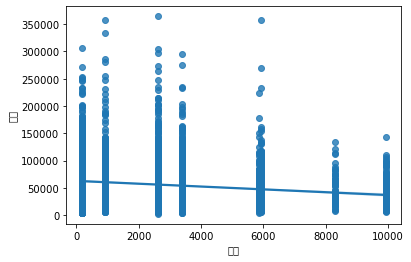

In [60]:
sns.regplot(x = '예산', y = '조회',data = df) # 

In [61]:
# 예산 - 조회대비스크랩, 상관관계 살펴보기
ols('조회대비스크랩 ~ 예산', df).fit().summary() #R-squared: 0.048 -> 없다고해도 무방

# null값을 채우니, 독립변수와 종속변수 간의 상관관계가 매우 떨어졌다. 
# null값(0)이 많아서 상관관계가 높게 나왔던 것 같다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                조회대비스크랩   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           6.55e-54
Time:                        19:14:56   Log-Likelihood:                -18226.
No. Observations:                4900   AIC:                         3.646e+04
Df Residuals:                    4898   BIC:                         3.647e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0846      0.249    120.821      0.000      29.596      30.573
예산            -0.0011   6.72e-05    -15.650      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1161.436   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2803.961
Skew:                           1.308   Prob(JB):                         0.00
Kurtosis:                       5.625   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='예산', ylabel='조회대비스크랩'>

/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_

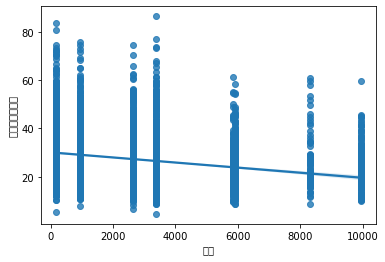

In [62]:
sns.regplot(x = '예산', y = '조회대비스크랩',data = df) 

- 결론 :'예산 - 조회대비스크랩'의 상관관계를 파악하기 힘들다. 

#### 1. 예산 - 스크랩, 좋아요

In [63]:
ols('예산 ~ 스크랩 + 좋아요', df).fit().summary() # 상관관계 낮음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     예산   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          2.34e-115
Time:                        19:28:58   Log-Likelihood:                -44221.
No. Observations:                4900   AIC:                         8.845e+04
Df Residuals:                    4897   BIC:                         8.847e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3550.1508     43.389     81.822      0.000    3465.089    3635.213
스크랩           -1.3820      0.060    -23.118      0.000      -1.499      -1.265
좋아요            3.7058      0.186     19.931      0.000       3.341       4.070
==============================================================================
Omnibus:                      871.552   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1815.473
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       5.114   Cond. No.                     3.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2. 예산 - 조회, 스크랩, 좋아요

In [64]:
ols('예산 ~ 조회 + 스크랩 + 좋아요', df).fit().summary() # 상관관계 낮음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     예산   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          7.04e-123
Time:                        19:29:14   Log-Likelihood:                -44201.
No. Observations:                4900   AIC:                         8.841e+04
Df Residuals:                    4896   BIC:                         8.844e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3751.1078     53.465     70.161      0.000    3646.293    3855.922
조회            -0.0107      0.002     -6.384      0.000      -0.014      -0.007
스크랩           -1.2493      0.063    -19.811      0.000      -1.373      -1.126
좋아요            4.1395      0.197     20.986      0.000       3.753       4.526
==============================================================================
Omnibus:                      835.460   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1749.958
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       5.120   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3. 예산 - 좋아요

In [65]:
ols('예산 ~ 좋아요', df).fit().summary() # 상관관계 낮음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     예산   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.70
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           5.50e-06
Time:                        19:30:16   Log-Likelihood:                -44475.
No. Observations:                4900   AIC:                         8.895e+04
Df Residuals:                    4898   BIC:                         8.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3170.9571     42.300     74.963      0.000    3088.030    3253.884
좋아요           -0.3150      0.069     -4.550      0.000      -0.451      -0.179
==============================================================================
Omnibus:                      925.248   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1800.421
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       4.892   Cond. No.                         855.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4. 예산 - 조회대비스크랩, 좋아요, 댓글

In [166]:
ols('예산 ~ 조회대비스크랩 + 좋아요 + 댓글', df).fit().summary() # 상관관계 낮음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     예산   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     93.90
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           4.36e-59
Time:                        21:39:10   Log-Likelihood:                -44348.
No. Observations:                4900   AIC:                         8.870e+04
Df Residuals:                    4896   BIC:                         8.873e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4060.4870     89.105     45.570      0.000    3885.801    4235.173
조회대비스크랩      -43.8457      3.072    -14.272      0.000     -49.869     -37.823
좋아요           -0.4599      0.111     -4.153      0.000      -0.677      -0.243
댓글             5.8407      0.990      5.901      0.000       3.900       7.781
==============================================================================
Omnibus:                     1084.569   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2379.291
Skew:                           1.267   Prob(JB):                         0.00
Kurtosis:                       5.286   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 5. 예산 - 조회, 스크랩, 좋아요, 댓글

In [168]:
ols('예산 ~ 조회 + 스크랩 + 좋아요 + 댓글', df).fit().summary() # 상관관계 낮음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     예산   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     156.7
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          2.23e-126
Time:                        21:40:13   Log-Likelihood:                -44190.
No. Observations:                4900   AIC:                         8.839e+04
Df Residuals:                    4895   BIC:                         8.842e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3639.8303     58.454     62.268      0.000    3525.234    3754.427
조회            -0.0114      0.002     -6.781      0.000      -0.015      -0.008
스크랩           -1.1958      0.064    -18.694      0.000      -1.321      -1.070
좋아요            3.6624      0.222     16.506      0.000       3.227       4.097
댓글             4.5143      0.969      4.659      0.000       2.615       6.414
==============================================================================
Omnibus:                      865.725   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1916.596
Skew:                           1.020   Prob(JB):                         0.00
Kurtosis:                       5.285   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""